In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 
# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:
# lecture des données sources d'entrainement 
df_feats=pd.read_csv('X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv('Y_train_CVw08PX.csv')

# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

# récupération du fichier df_langue.csv
df_langue=pd.read_csv('df_langue.csv')
df=df.merge(df_langue.drop(['Unnamed: 0','prdtypecode'], axis=1),on='Id',how='inner')

Lcat=df_target.sort_values(by='prdtypecode')['prdtypecode'].unique()


nomenclature=pd.read_csv('NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

# 
stopwordFR = pd.read_csv("stopwords_FR.csv")
df_top_40=pd.DataFrame()

###  Liste des 40 mots les plus fréquents par categorie
###  je compte le nombre d'occurences de chaque mot dans chaque catégorie

In [3]:

vect=CountVectorizer(min_df=4, stop_words=stopwordFR['MOT'].tolist())
TailleCat ={}
for c in Lcat:
    df_cat=df[df['prdtypecode']==c]
    vect=vect.fit(df_cat['designation'])
    TailleCat[c]=len(vect.vocabulary_)
    print("Catégorie : ",c,"   Nombre de mots : ",  TailleCat[c],"  Nombre de produits ",len(df_cat))
    bag_of_words=vect.transform(df_cat['designation'])
    word_occurrences = np.sum(bag_of_words, axis=0)
    words = vect.get_feature_names_out()
    word_occurrences_dict = dict(zip(words, word_occurrences.tolist()[0]))
    top_40_words = sorted(word_occurrences_dict.items(), key=lambda x: x[1], reverse=True)[:40]
    dfout=pd.DataFrame(top_40_words,columns=['mot','occurence'])
    dfout['prdtypecode']=c
    for word, occurrences in top_40_words:
        print(f"{word}: {occurrences}")
    df_top_40=pd.concat([df_top_40,dfout])    
    

Catégorie :  10    Nombre de mots :  842   Nombre de produits  3116
tome: 154
edition: 127
guide: 84
histoire: 84
france: 60
vie: 55
art: 50
collection: 48
book: 47
journal: 35
life: 35
édition: 35
livre: 34
volume: 34
saint: 33
paris: 32
cours: 28
grand: 27
droit: 26
world: 26
monde: 24
guerre: 23
history: 23
pratique: 23
revue: 23
français: 21
jean: 21
nos: 21
science: 21
temps: 21
ans: 20
cd: 20
siècle: 20
pays: 19
homme: 18
oeuvres: 18
vol: 18
100: 17
europe: 17
lettres: 17
Catégorie :  40    Nombre de mots :  759   Nombre de produits  2508
import: 584
jeu: 384
magideal: 282
pc: 235
allemand: 226
edition: 194
japonais: 166
xbox: 109
version: 106
nintendo: 100
anglais: 81
complet: 78
jap: 77
jeux: 73
360: 70
ensemble: 70
japon: 64
câble: 62
ds: 62
playstation: 61
ps4: 61
game: 58
collection: 53
wii: 53
console: 51
contrôleur: 50
ps3: 50
audio: 49
one: 47
super: 47
world: 47
sony: 46
protection: 44
collector: 42
us: 42
pack: 40
adaptateur: 38
ii: 38
manette: 36
uk: 36
Catégorie :  50

In [4]:
print(len(vect.vocabulary_))
vect.vocabulary_

162


{'season': 118,
 'pass': 105,
 'extension': 53,
 'jeu': 75,
 'téléchargement': 145,
 'crusader': 33,
 'kings': 79,
 'ii': 69,
 'dlc': 42,
 'rage': 111,
 'last': 81,
 'jagged': 74,
 'alliance': 7,
 'dragon': 43,
 'ball': 12,
 'ultimate': 147,
 'edition': 46,
 'complete': 31,
 'watch': 155,
 'pack': 104,
 'shadow': 121,
 'warrior': 152,
 'europa': 52,
 'universalis': 148,
 'iv': 73,
 'farm': 58,
 'collector': 30,
 'tom': 138,
 'clancy': 26,
 'two': 143,
 'dark': 35,
 'warhammer': 151,
 'dawn': 36,
 'war': 150,
 'collection': 29,
 'gold': 61,
 'guild': 64,
 'blood': 17,
 'super': 134,
 'star': 130,
 'sky': 124,
 'game': 59,
 'year': 160,
 'legends': 84,
 'maze': 94,
 '1001': 0,
 'jigsaw': 76,
 'earth': 45,
 'chronicles': 22,
 'division': 41,
 'dungeons': 44,
 'digital': 39,
 'deluxe': 38,
 'sid': 122,
 'meier': 95,
 'civilization': 25,
 'vi': 149,
 'mac': 88,
 'hotel': 68,
 'premium': 108,
 'black': 16,
 'mania': 93,
 'édition': 161,
 'iron': 71,
 'stories': 132,
 'wars': 154,
 'ombre': 1

In [5]:
print(bag_of_words.shape)
bag_of_words.toarray()

(872, 162)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### création dut TOP20 Général

In [6]:
# MOTS LES PLUS UTILISES TOUTES CATAGORIES CONFONDUES
Gvect =vect.fit(df['designation'])

Gbag_of_words=Gvect.transform(df['designation'])
word_occurrences = np.sum(Gbag_of_words, axis=0)
words = vect.get_feature_names_out()
word_occurrences_dict = dict(zip(words, word_occurrences.tolist()[0]))
Gtop_20_words = sorted(word_occurrences_dict.items(), key=lambda x: x[1], reverse=True)[:20]
dfG=pd.DataFrame(Gtop_20_words,columns=['mot','occurence'])
dfG.head(20)


,mot,occurence
0,piscine,4778
1,lot,4310
2,jeu,4164
3,générique,3770
4,coussin,3521
5,kit,2624
6,blanc,2409
7,rc,2379
8,enfants,2374
9,taie,2308


### Nombre d'occurences par catégorie des 20 mots les plas présents dans la globalité du corpus

In [7]:
vect=CountVectorizer(min_df=4, stop_words=stopwordFR['MOT'].tolist())
TailleCat ={}
dfWords=pd.DataFrame()
for c in Lcat:
    df_cat=df[df['prdtypecode']==c]
    vect=vect.fit(df_cat['designation'])
    TailleCat[c]=len(vect.vocabulary_)
    print("Catégorie : ",c,"   Nombre de mots : ",  TailleCat[c])
    bag_of_words=vect.transform(df_cat['designation'])
    word_occurrences = np.sum(bag_of_words, axis=0)
    words = vect.get_feature_names_out()
    word_occurrences_dict = dict(zip(words, word_occurrences.tolist()[0]))
    dfout=pd.DataFrame.from_dict(word_occurrences_dict,orient = 'index')
    dfout=dfout.rename({0: c},axis=1)
    if dfWords.shape[0] ==  0:
        dfWords=dfout
    else :
        dfWords=pd.concat([dfWords,dfout],axis=1)

print(dfWords.shape)        
dfWords=dfWords.fillna(0)
dfWords['total']=dfWords.sum(axis=1)
dfWords['var']=dfWords.var(axis=1)
dfWords=dfWords.sort_values('total',ascending=False)
dfWords.head(30)      
    

Catégorie :  10    Nombre de mots :  842
Catégorie :  40    Nombre de mots :  759
Catégorie :  50    Nombre de mots :  624
Catégorie :  60    Nombre de mots :  316
Catégorie :  1140    Nombre de mots :  897
Catégorie :  1160    Nombre de mots :  1237
Catégorie :  1180    Nombre de mots :  250
Catégorie :  1280    Nombre de mots :  1871
Catégorie :  1281    Nombre de mots :  676
Catégorie :  1300    Nombre de mots :  1907
Catégorie :  1301    Nombre de mots :  275
Catégorie :  1302    Nombre de mots :  1104
Catégorie :  1320    Nombre de mots :  1161
Catégorie :  1560    Nombre de mots :  1875
Catégorie :  1920    Nombre de mots :  914
Catégorie :  1940    Nombre de mots :  311
Catégorie :  2060    Nombre de mots :  1799
Catégorie :  2220    Nombre de mots :  383
Catégorie :  2280    Nombre de mots :  2630
Catégorie :  2403    Nombre de mots :  1669
Catégorie :  2462    Nombre de mots :  362
Catégorie :  2522    Nombre de mots :  1674
Catégorie :  2582    Nombre de mots :  1098
Catégori

,10,40,50,60,1140,1160,1180,1280,1281,1300,1301,1302,1320,1560,1920,1940,2060,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905,total,var
piscine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,7.0,0.0,0.0,29.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4674.0,14.0,0.0,0.0,4770.0,1.531500e+06
lot,0.0,0.0,21.0,0.0,57.0,67.0,17.0,65.0,24.0,16.0,25.0,33.0,101.0,215.0,47.0,62.0,57.0,20.0,6.0,1879.0,354.0,992.0,73.0,136.0,40.0,0.0,0.0,4307.0,7.647060e+05
jeu,0.0,384.0,336.0,1200.0,13.0,14.0,44.0,153.0,398.0,11.0,32.0,112.0,54.0,29.0,9.0,0.0,14.0,5.0,15.0,10.0,349.0,30.0,17.0,47.0,13.0,6.0,866.0,4161.0,6.525334e+05
générique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3741.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,3763.0,9.678745e+05
coussin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,22.0,90.0,136.0,3076.0,0.0,96.0,29.0,0.0,0.0,0.0,4.0,46.0,5.0,10.0,0.0,0.0,3519.0,7.450187e+05
kit,0.0,28.0,43.0,0.0,10.0,0.0,11.0,75.0,24.0,111.0,12.0,30.0,23.0,27.0,0.0,0.0,71.0,0.0,0.0,0.0,7.0,39.0,59.0,1932.0,109.0,0.0,0.0,2611.0,3.563590e+05
blanc,4.0,10.0,55.0,14.0,16.0,52.0,4.0,143.0,10.0,26.0,8.0,13.0,204.0,502.0,106.0,16.0,152.0,11.0,22.0,17.0,0.0,213.0,227.0,533.0,48.0,0.0,0.0,2406.0,2.111863e+05
enfants,10.0,4.0,9.0,127.0,7.0,0.0,0.0,869.0,330.0,56.0,219.0,168.0,132.0,78.0,20.0,0.0,142.0,0.0,33.0,34.0,4.0,22.0,19.0,59.0,17.0,12.0,0.0,2371.0,2.159036e+05
rc,0.0,0.0,20.0,0.0,0.0,6.0,0.0,470.0,16.0,1853.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2370.0,3.136930e+05
taie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,2204.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2306.0,3.488747e+05


In [10]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stopwordFR['MOT'].tolist(), max_font_size=50, random_state=42)

In [11]:
df_top_40.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mot          1080 non-null   object
 1   occurence    1080 non-null   int64 
 2   prdtypecode  1080 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 33.8+ KB


10 Catégorie  livres
40 Catégorie  jeux video pour pc et consoles
50 Catégorie   accesoires jeux video
60 Catégorie  consoles de jeux video
1140 Catégorie  produits derives “geeks” et figurines
1160 Catégorie  cartes collectionables
1180 Catégorie  figurines collectionables pour jeux de societe
1280 Catégorie  jouets, peluches, puppets
1281 Catégorie  jeux de societe/cartes
1300 Catégorie  Petites voitures (jouets) et maquettes
1301 Catégorie  accesoires pour petis enfants/bebes et mobilier de jeu (flechettes, billard, babyfoot)
1302 Catégorie  jeux d'exterieur
1320 Catégorie  sacs pour femmes et accesore petite enfance
1560 Catégorie  Mobilier et produits decoration/rangement pour la maison
1920 Catégorie  linge de maison (cousins, rideaux, serviettes, nappes, draps)
1940 Catégorie  nouriture (cafes,infusions,conserves, epices,etc)
2060 Catégorie  lampes et accesoires decoration pour maison
2220 Catégorie  accesoires mascots/pets
2280 Catégorie  magazines
2403 Catégorie  livres et bds

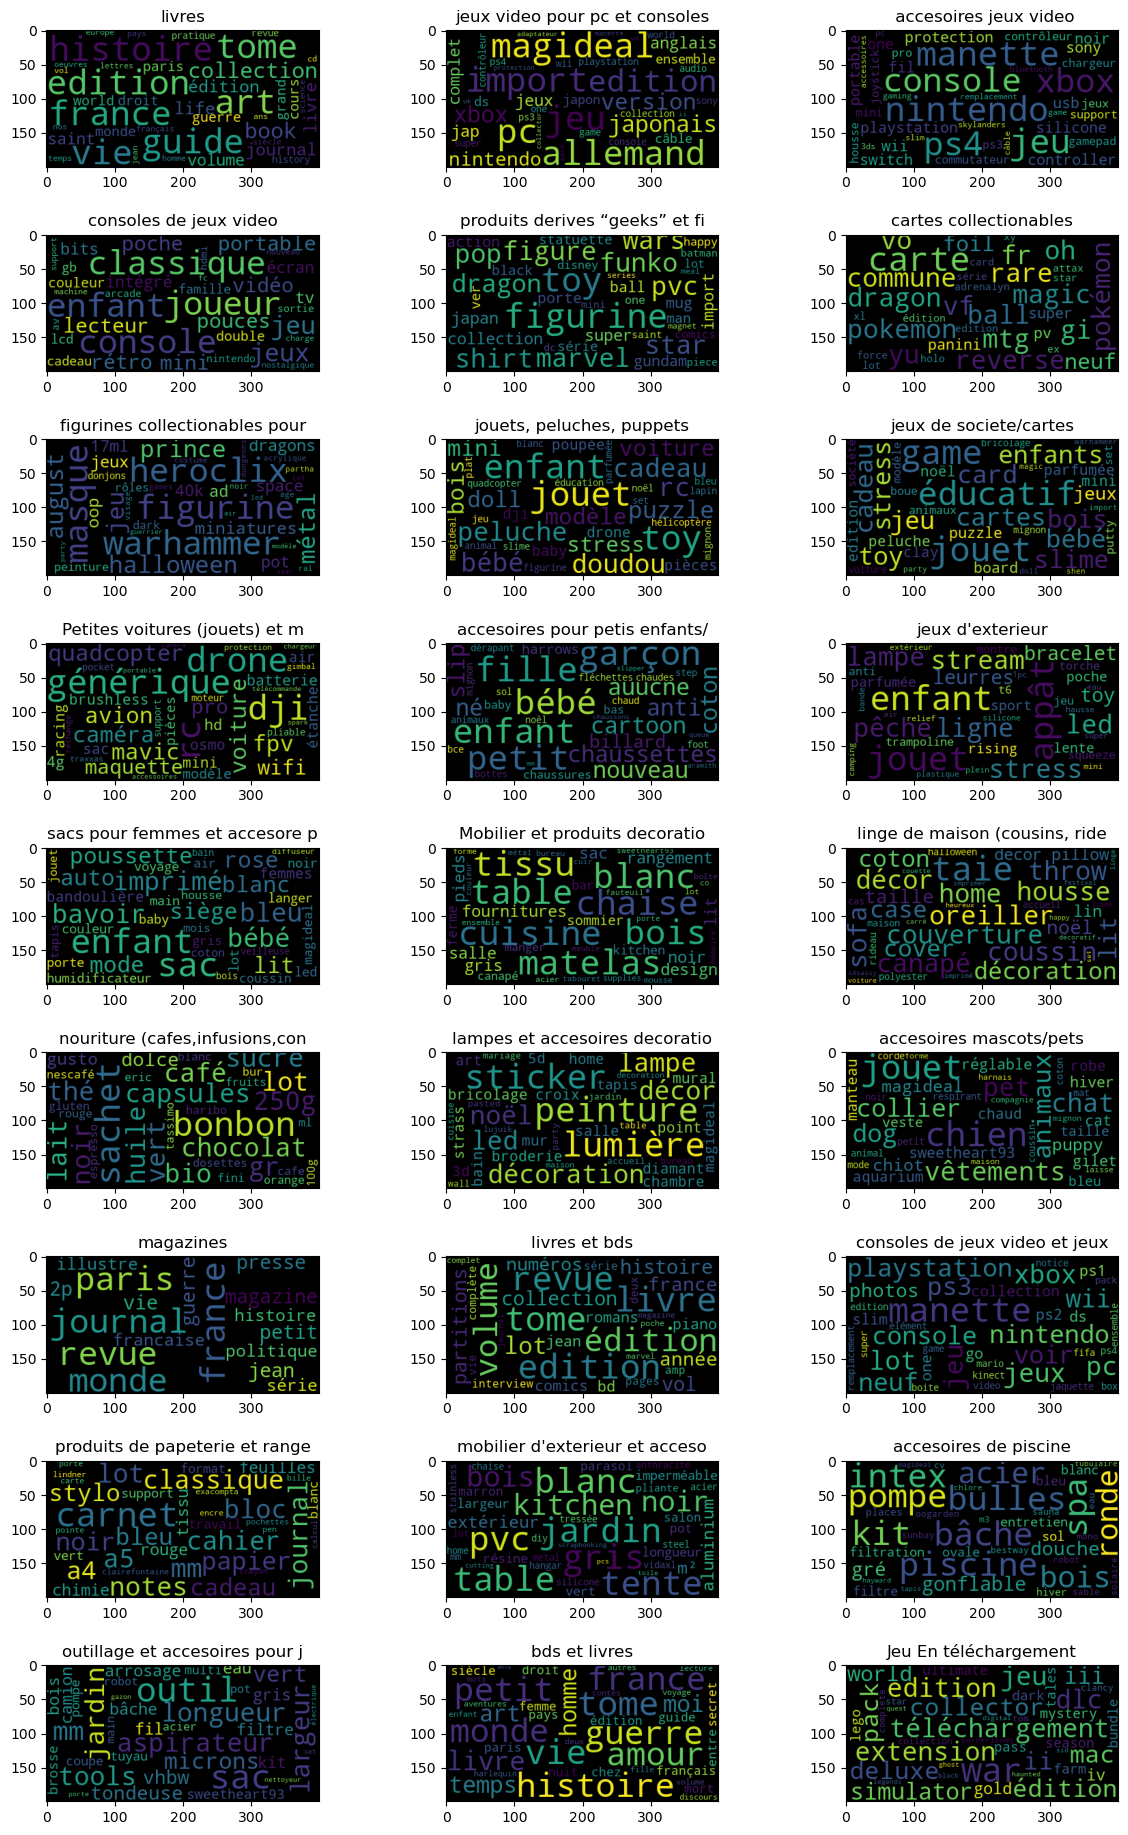

In [12]:
fig, axs = plt.subplots(9, 3, figsize=(15,23))
for c,ax in zip(Lcat,axs.flat):
    #print(c)
    df_cat=df_top_40[df_top_40['prdtypecode']==c]
    # Définir la variable text
    text = ""
    for mot in df_cat['mot'] : 
        text += mot + " "
    print(c,"Catégorie ",catdict[c] )    
    # Générer et afficher le nuage de mots
    #plt.figure(figsize= (10,6)) # Initialisation d'une figure
    wc.generate(text)           # "Calcul" du wordcloud
    ax.imshow(wc) # Affichage
    ax.set_title( catdict[c][:30])
plt.subplots_adjust( wspace=0.1,hspace=0.5)    
plt.show()
   